In [4]:
import os

# List files in the /content/ directory
print(os.listdir('/content/'))


['.config', 'drive', 'Copy of devnagari digit.zip', 'sample_data', '.ipynb_checkpoints']


In [5]:
import zipfile

# Path to the ZIP file
zip_path = '/content/Copy of devnagari digit.zip'

# Directory to extract the files into
extract_to_directory = '/content/extracted_devnagari_digit'
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Files extracted successfully!")


Files extracted successfully!


In [6]:
# List files in the directory where you extracted the files
extracted_files = os.listdir(extract_to_directory)
print(extracted_files)


['DevanagariHandwrittenDigitDataset']


In [21]:
import numpy as np
from PIL import Image
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.models import load_model

**TASK 1**

In [13]:
def load_images_and_labels(data_dir, size=(28,28)):
    images = []
    labels = []
    try:
        for folder in os.listdir(data_dir):
            folder_path = os.path.join(data_dir, folder)
            label = int(folder.split('_')[-1])
            for image_filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_filename)
                image = Image.open(image_path).convert('L').resize(size)
                images.append(np.array(image) / 255.0)
                labels.append(label)
        print("Task was successful!")
        return np.array(images), to_categorical(np.array(labels), num_classes=10)
    except Exception as e:
        print(f"Task was unsuccessful: {e}")
        return None, None

train_images, train_labels = load_images_and_labels('/content/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Train')
test_images, test_labels = load_images_and_labels('/content/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Test')

if train_images is not None and test_images is not None:
    print("Images and labels loaded successfully.")
else:
    print("Failed to load images and labels.")

Task was successful!
Task was successful!
Images and labels loaded successfully.


**TASK 2**

In [16]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])


**TASK 3**

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**TASK 4**

In [18]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2938 - loss: 1.9845 - val_accuracy: 0.0000e+00 - val_loss: 7.8863
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8820 - loss: 0.5803 - val_accuracy: 0.0000e+00 - val_loss: 9.4488
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9517 - loss: 0.2102 - val_accuracy: 0.0000e+00 - val_loss: 10.3105
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9662 - loss: 0.1338 - val_accuracy: 0.0000e+00 - val_loss: 10.9392
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9767 - loss: 0.0964 - val_accuracy: 0.0000e+00 - val_loss: 11.4281
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9841 - loss: 0.0723 - val_accuracy: 0.0000e+00 - val_loss: 11.9109
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9888 - loss: 0.0543 - val_accuracy: 0.0000e+00 - val_loss: 12.2200
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.98

**TASK 5**

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.4089
Test Accuracy: 79.07%


**TASK 6**

In [22]:
model.save('devnagari_digit_model.h5')
saved_model = load_model('devnagari_digit_model.h5')
test_loss, test_accuracy = saved_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.4089
Test accuracy: 79.07%


**TASK 7**

In [23]:
predictions = saved_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Visulization**

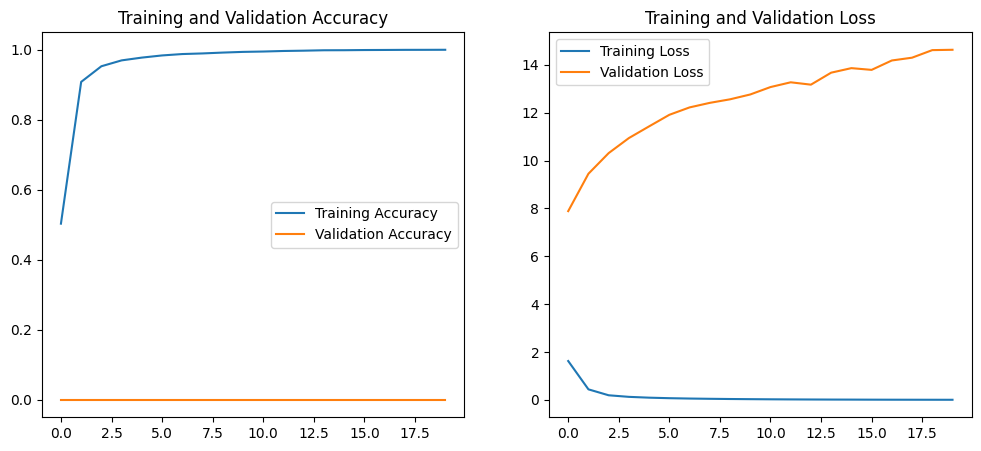

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
